# Goal:
Step-1: The goal here is to perform sanity checks on the dex-audit results and perform dex-insightface comparisons:

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format='retina'
from matplotlib.patches import Rectangle# For the bounding box
import matplotlib.image as image
from scipy.stats import describe

Load the data:

In [2]:
df_final=pd.read_csv('df_census_imagenet_61.csv')
age_vec=np.load('./NPY_imagenet/age_dataset_audit_train_dex.npy')
gender_vec=np.load('./NPY_imagenet/gender_dataset_audit_train_dex.npy')
# Read Table-6 from the paper:
df_audit_top12=pd.read_csv('./df_imagenet/df_audit_top12.csv')

132201 132201
[0.07077102 0.50826393 0.26828844 0.1355663  0.01711031]
This matches perfectly with Table-5 in https://arxiv.org/abs/1905.01347
0.41618444641114666
Paper claimed 41.62%


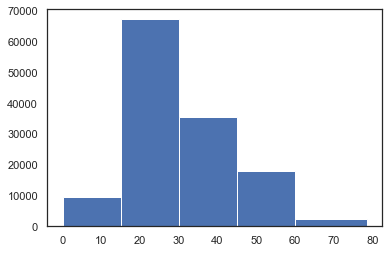

In [3]:
print(len(age_vec),len(gender_vec))
count_bins=plt.hist(age_vec,bins=[0,15,30,45,60,max(age_vec)])                
count=count_bins[0]
print(count/count.sum()) 
print('This matches perfectly with Table-5 in https://arxiv.org/abs/1905.01347')
#############################

print((gender_vec<=0.5).mean())
print('Paper claimed 41.62%')
##############################

In [4]:
N_humans_train_if=df_final.Nunique_humans_train.sum()
N_humans_val_if=df_final.Nunique_humans_val.sum()
N_humans_dex=(df_final.n_faceswithages_audit).sum()
#####################################################
print(N_humans_train_if,N_humans_val_if,N_humans_train_if+N_humans_val_if,N_humans_dex)
(N_humans_train_if,N_humans_val_if,N_humans_train_if+N_humans_val_if,N_humans_dex)/df_final.n_train.sum()

97678 3392 101070 132201


array([0.07624143, 0.00264759, 0.07888901, 0.10318795])

The Cardinality, Age and Gender comparisons.

C:\Users\Inuyasha\anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


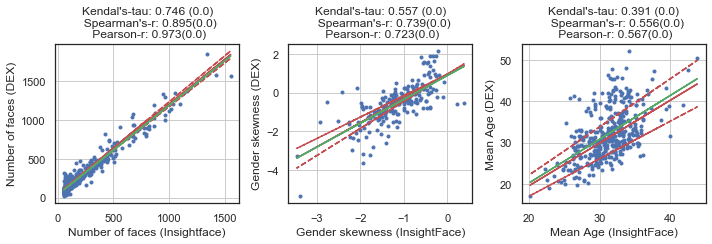

In [5]:
import scipy.stats as stats
#################################
plt.figure(figsize=(10,3.5))
#################################
plt.subplot(131)
df_filt=df_final.loc[df_final.Nunique_humans_train>50]
x=df_filt.Nunique_humans_train.values.astype(float)
y=df_filt.n_faceswithages_audit.values.astype(float)
res = stats.theilslopes(y, x, 0.90)
lsq_res = stats.linregress(x, y)
plt.plot(x, y, 'b.')
plt.plot(x, res[1] + res[0] * x, 'r-')
plt.plot(x, res[1] + res[2] * x, 'r--')
plt.plot(x, res[1] + res[3] * x, 'r--')
plt.plot(x, lsq_res[1] + lsq_res[0] * x, 'g-')
plt.grid('On')
plt.xlabel('Number of faces (Insightface)')
plt.ylabel('Number of faces (DEX)')
from scipy.stats import kendalltau, spearmanr, pearsonr
k_t=kendalltau(df_filt.Nunique_humans_train,df_filt.n_faceswithages_audit)
s_r=spearmanr(df_filt.Nunique_humans_train,df_filt.n_faceswithages_audit)
p_r=pearsonr(df_filt.Nunique_humans_train,df_filt.n_faceswithages_audit)
plt.title(f'Kendal\'s-tau: {str(np.round(k_t[0],3))} ({str(np.round(k_t[1],3))})\n  Spearman\'s-r: {str(np.round(s_r[0],3))}({str(np.round(s_r[1],3))})\n Pearson-r: {np.round(p_r[0],3)}({np.round(p_r[1],3)})')

############################################
plt.subplot(132)
X_mat=df_final.loc[df_final.Nunique_humans_train>100,['gender_skewness_train','skew_gender_audit']].values
x=X_mat[:,0]
y=X_mat[:,1]
res = stats.theilslopes(y, x, 0.90)
lsq_res = stats.linregress(x, y)
plt.plot(x, y, 'b.')
plt.plot(x, res[1] + res[0] * x, 'r-')
plt.plot(x, res[1] + res[2] * x, 'r--')
plt.plot(x, res[1] + res[3] * x, 'r--')
plt.plot(x, lsq_res[1] + lsq_res[0] * x, 'g-')
plt.grid('On')
plt.xlabel('Gender skewness (InsightFace)')
plt.ylabel('Gender skewness (DEX)')
from scipy.stats import kendalltau, spearmanr, pearsonr
k_t=kendalltau(x,y)
s_r=spearmanr(x,y)
p_r=pearsonr(x,y)
plt.title(f'Kendal\'s-tau: {str(np.round(k_t[0],3))} ({str(np.round(k_t[1],3))})\n  Spearman\'s-r: {str(np.round(s_r[0],3))}({str(np.round(s_r[1],3))})\n Pearson-r: {np.round(p_r[0],3)}({np.round(p_r[1],3)})')
############################################
plt.subplot(133)
df_filt['mean_age_insightface']=((df_filt.n_men_train*df_filt.mean_age_men_train)+(df_filt.n_women_train*df_filt.mean_age_women_train))/(df_filt.n_men_train+df_filt.n_women_train)
x=df_filt['mean_age_insightface']
y=df_filt.mean_age_audit
res = stats.theilslopes(y, x, 0.90)
lsq_res = stats.linregress(x, y)
plt.plot(x, y, 'b.')
plt.plot(x, res[1] + res[0] * x, 'r-')
plt.plot(x, res[1] + res[2] * x, 'r--')
plt.plot(x, res[1] + res[3] * x, 'r--')
plt.plot(x, lsq_res[1] + lsq_res[0] * x, 'g-')
plt.grid('On')
plt.xlabel('Mean Age (InsightFace)')
plt.ylabel('Mean Age (DEX)')
from scipy.stats import kendalltau, spearmanr, pearsonr
k_t=kendalltau(x,y)
s_r=spearmanr(x,y)
p_r=pearsonr(x,y)
plt.title(f'Kendal\'s-tau: {str(np.round(k_t[0],3))} ({str(np.round(k_t[1],3))})\n  Spearman\'s-r: {str(np.round(s_r[0],3))}({str(np.round(s_r[1],3))})\n Pearson-r: {np.round(p_r[0],3)}({np.round(p_r[1],3)})')
############################################

plt.tight_layout()
plt.savefig('./plots_paper/dex_if_comparisons.pdf',bbox_inches='tight')

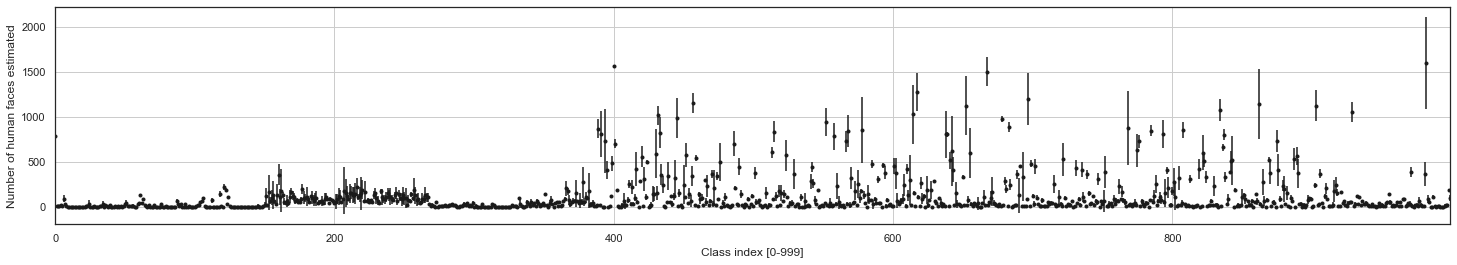

In [6]:
y=(df_final.Nunique_humans_train+df_final.n_faceswithages_audit)/2
x=np.arange(1000)
yerr=(df_final.Nunique_humans_train-df_final.n_faceswithages_audit)
plt.figure(figsize=(25,4))
plt.errorbar(x, y, yerr, fmt='.k')
plt.grid('On')
plt.xlim([0,999])
plt.xlabel('Class index [0-999]')
plt.ylabel('Number of human faces estimated')
plt.savefig('./plots_paper/dex_if_Nfaces.pdf',bbox_inches='tight')

In [7]:
df_filt.loc[(df_filt.age_min<8),['class_number','wordnet_id','label']]

,class_number,wordnet_id,label
106,106,n01883070,wombat
156,156,n02086646,Blenheim spaniel
183,183,n02093859,Kerry blue terrier
207,207,n02099601,golden retriever
212,212,n02100735,English setter
...,...,...,...
917,917,n06596364,comic book
921,921,n07248320,"book jacket, dust cover, dust jacket, dust wra..."
929,929,n07615774,"ice lolly, lolly, lollipop, popsicle"
981,981,n09835506,"ballplayer, baseball player"


Gender and NSFW comparisons:

In [8]:
COLS=['mean_age_audit','mean_gender_audit','mean_nsfw_train']
df_filt=df_final.loc[df_final.Nunique_humans_train>50]
df_sel=df_filt.loc[:,COLS]
df_sel.reset_index(inplace=True,drop=True)
df_sel.shape

(389, 3)

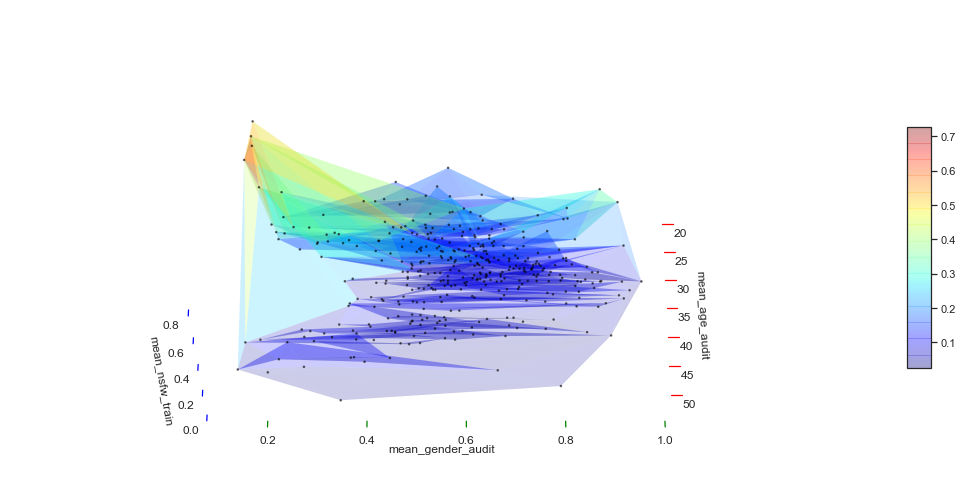

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(15,7))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 1, 1, projection='3d')
plt_1=ax.plot_trisurf(df_sel.iloc[:,0],df_sel.iloc[:,1],df_sel.iloc[:,2],shade=True,linewidth=0.02,antialiased=True,cmap=cm.jet,alpha=0.2)
ax.scatter(df_sel.iloc[:,0],df_sel.iloc[:,1],df_sel.iloc[:,2], marker='.', s=10, c="black", alpha=0.5)
fig.colorbar(plt_1, shrink=0.5, aspect=10)
ax.tick_params(labelsize=12)
ax.view_init(azim=0, elev=60)
######################################
ax.set_xlabel(COLS[0],fontsize=12); ax.set_ylabel(COLS[1],fontsize=12); ax.set_zlabel(COLS[2],fontsize=12)


ax.xaxis._axinfo["grid"].update({"linewidth":1, "color" : (0.95, 0.95, 0.95, 0.1),"alpha":0.2,'linestyle' : ":"})
ax.yaxis._axinfo["grid"].update({"linewidth":1, "color" :(0.95, 0.95, 0.95, 0.1),"alpha":0.2,'linestyle' : ":"})
ax.zaxis._axinfo["grid"].update({"linewidth":1, "color" :(0.95, 0.95, 0.95, 0.1),"alpha":0.2,'linestyle' : ":"})

ax.xaxis._axinfo['tick']['color']='red'
ax.yaxis._axinfo['tick']['color']='green'
ax.zaxis._axinfo['tick']['color']='blue'



# Make panes transparent
ax.xaxis.pane.fill = False # Left pane
ax.yaxis.pane.fill = False # Right pane

# Remove grid lines
ax.grid(False)

# Remove tick labels
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_zticklabels([])

# Transparent spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.1))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.1))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.1))

# Transparent panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.1))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.1))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.1))


plt.tight_layout()
plt.savefig('./plots_paper/AGN_3d.pdf',bbox_inches='tight')


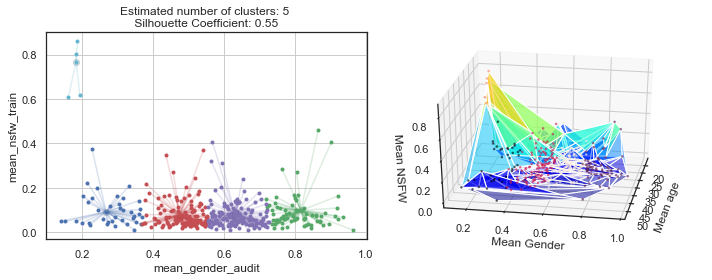

In [10]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
cols=['mean_gender_audit','mean_nsfw_train']
# #############################################################################
X=df_filt.loc[:,cols].values
# Compute Affinity Propagation
af = AffinityPropagation(preference=-1).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
import matplotlib.pyplot as plt
from itertools import cycle

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6,alpha=0.2)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col,alpha=0.2)

##############################################


plt.grid('On')
plt.xlabel(cols[0])
plt.ylabel(cols[1])
score=metrics.silhouette_score(X, labels, metric='sqeuclidean')
plt.title(f'Estimated number of clusters: {n_clusters_} \n Silhouette Coefficient: {np.round(score,3)} ')

ax = fig.add_subplot(1,2,2, projection='3d')
import matplotlib.tri as mtri
x=df_sel.iloc[:,0]
y=df_sel.iloc[:,1]
z=df_sel.iloc[:,2]
triang = mtri.Triangulation(x, y)
ax.plot_trisurf(triang, z, cmap='jet', alpha=0.5)
ax.scatter(x,y,z, marker='.', s=10, c=labels, alpha=0.5)
ax.view_init(elev=30, azim=10)

ax.set_xlabel('Mean age')
ax.set_ylabel('Mean Gender')
ax.set_zlabel('Mean NSFW')
plt.tight_layout()
plt.savefig('./plots_paper/AGN_3d_scatter.pdf',bbox_inches='tight')

In [11]:
df_filt['cluster_affinity']=labels
df_tmp=df_filt.sort_values(by='mean_nsfw_train',ascending=False)
df_tmp.reset_index(inplace=True,drop=True)
df_age_gender_nsfw=df_tmp.loc[0:4,['class_number','wordnet_id','label','mean_gender_audit','mean_age_audit', 'mean_nsfw_train']]
df_age_gender_nsfw

C:\Users\Inuyasha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,class_number,wordnet_id,label,mean_gender_audit,mean_age_audit,mean_nsfw_train
0,445,n02837789,"bikini, two-piece",0.186883,24.882950,0.859369
1,638,n03710637,maillot,0.182194,25.910868,0.801976
2,639,n03710721,"maillot, tank suit",0.183183,26.672176,0.768278
3,655,n03770439,"miniskirt, mini",0.193509,29.955082,0.619425
4,459,n02892767,"brassiere, bra, bandeau",0.161576,25.030235,0.610233


In [12]:
print(df_age_gender_nsfw.to_latex(index=False))

\begin{tabular}{rllrrr}
\toprule
 class\_number & wordnet\_id &                    label &  mean\_gender\_audit &  mean\_age\_audit &  mean\_nsfw\_train \\
\midrule
          445 &  n02837789 &        bikini, two-piece &           0.186883 &       24.882950 &         0.859369 \\
          638 &  n03710637 &                  maillot &           0.182194 &       25.910868 &         0.801976 \\
          639 &  n03710721 &       maillot, tank suit &           0.183183 &       26.672176 &         0.768278 \\
          655 &  n03770439 &          miniskirt, mini &           0.193509 &       29.955082 &         0.619425 \\
          459 &  n02892767 &  brassiere, bra, bandeau &           0.161576 &       25.030235 &         0.610233 \\
\bottomrule
\end{tabular}



# Children:

In [15]:
import numpy as np
from sklearn.neighbors import KDTree
rng = np.random.RandomState(0)
col_children=['class_number','wordnet_id','label','age_min_train','mean_age_women_train','mean_age_audit']

ANCHOR_WORD='bassinet'
X=df_final.loc[:,['umap_x','umap_y']]
tree_umap = KDTree(X, leaf_size=2) 
umap_bib=df_final.loc[df_final.label==ANCHOR_WORD,['umap_x','umap_y']].values[0]
dist_children, ind_children = tree_umap.query(umap_bib.reshape(1,2), k=1000)
df_children=df_final.loc[ind_children[0],col_children]

print(df_children.iloc[0:5,:].to_latex(index=False))


\begin{tabular}{rllrrr}
\toprule
 class\_number & wordnet\_id &       label &  age\_min\_train &  mean\_age\_women\_train &  mean\_age\_audit \\
\midrule
          431 &  n02804414 &    bassinet &            7.0 &             20.673913 &       22.917737 \\
          793 &  n04209133 &  shower cap &            1.0 &             29.042194 &       25.063690 \\
          868 &  n04476259 &        tray &           14.0 &             23.823529 &       29.040962 \\
          516 &  n03125729 &      cradle &            1.0 &             17.461538 &       21.882087 \\
          520 &  n03131574 &   crib, cot &            1.0 &             17.318841 &       17.139022 \\
\bottomrule
\end{tabular}



Text(0.5, 0, 'Sorted Class index')

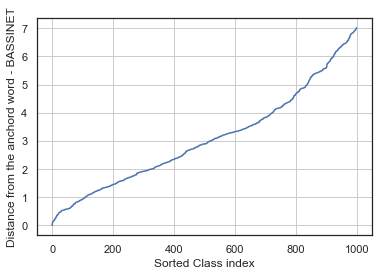

In [16]:
dist_children, ind_children = tree_umap.query(umap_bib.reshape(1,2), k=1000)
plt.plot(dist_children[0])
plt.grid('On')
plt.ylabel('Distance from the anchord word - BASSINET')
plt.xlabel('Sorted Class index')

In [17]:
df_final.loc[ind_children[0],'dist_bassinet']=dist_children[0]
print(df_final.loc[431,'dist_bassinet'])

0.0


In [18]:
col_children=['class_number',
 'wordnet_id',
 'label',
 'age_min_train',
 'mean_age_women_train',
 'mean_age_audit',
 'dist_bassinet']
################################
df_tmp=df_final.loc[(df_final.dist_bassinet<0.6)&(df_final.age_min_train<10),col_children]
df_tmp_2=df_tmp.sort_values(by='dist_bassinet')
df_tmp_2.reset_index(inplace=True,drop=True)
print(df_tmp_2.iloc[0:10].to_latex(index=False))

\begin{tabular}{rllrrrr}
\toprule
 class\_number & wordnet\_id &                                         label &  age\_min\_train &  mean\_age\_women\_train &  mean\_age\_audit &  dist\_bassinet \\
\midrule
          431 &  n02804414 &                                      bassinet &            7.0 &             20.673913 &       22.917737 &       0.000000 \\
          793 &  n04209133 &                                    shower cap &            1.0 &             29.042194 &       25.063690 &       0.091467 \\
          516 &  n03125729 &                                        cradle &            1.0 &             17.461538 &       21.882087 &       0.141933 \\
          520 &  n03131574 &                                     crib, cot &            1.0 &             17.318841 &       17.139022 &       0.152323 \\
          882 &  n04517823 &                        vacuum, vacuum cleaner &            1.0 &             21.435897 &       27.051655 &       0.190801 \\
          999 &  n15075

# Accuracy:

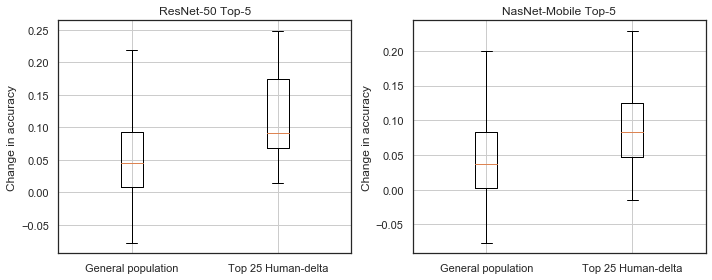

In [19]:
col_acc=[  'label',
 'mean_top5_train_r50',
 'mean_top5_val_r50',
'n_faceswithages_audit','n_humans_train','n_humans_val','delta_humans_train_val','delta_acc']

df_acc_srt_1=df_final.sort_values(by='mean_top5_val_r50')
df_acc_srt_1.reset_index(inplace=True,drop=True)
df_acc_srt_1['delta_humans_train_val']=np.abs(100*((df_acc_srt_1.n_humans_train/df_acc_srt_1.n_train)-(df_acc_srt_1.n_humans_val/df_acc_srt_1.n_val)))
df_acc_srt_1['delta_acc_resnet']=(df_acc_srt_1.mean_top5_train_r50-df_acc_srt_1.mean_top5_val_r50)
df_acc_srt_1['delta_acc_nasnet']=(df_acc_srt_1.mean_top5_train_nnm-df_acc_srt_1.mean_top5_val_nnm)

###########################################################

df_worst_human_delta=df_acc_srt_1.sort_values(by='delta_humans_train_val',ascending=False)[0:25]

plt.figure(figsize=(10,4))
plt.subplot(121)
lst=[df_acc_srt_1['delta_acc_resnet'],df_worst_human_delta['delta_acc_resnet']]
plt.boxplot(lst, showfliers=False);
plt.xticks([1,2],['General population','Top 25 Human-delta'])
plt.ylabel('Change in accuracy')
plt.title('ResNet-50 Top-5')
plt.grid('On')

##########################

plt.subplot(122)
lst=[df_acc_srt_1['delta_acc_nasnet'],df_worst_human_delta['delta_acc_nasnet']]
plt.boxplot(lst, showfliers=False);
plt.xticks([1,2],['General population','Top 25 Human-delta'])
plt.ylabel('Change in accuracy')
plt.title('NasNet-Mobile Top-5')
plt.grid('On')
plt.tight_layout()
#################

(-0.08846501040283877, -0.028145956456215322)


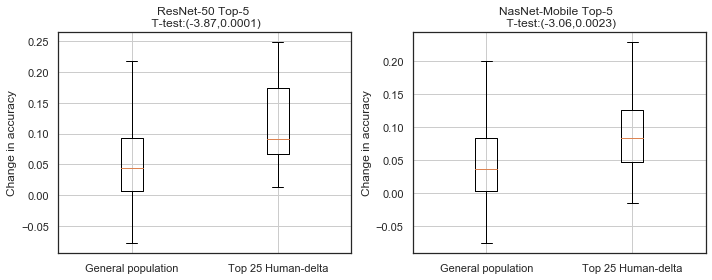

In [20]:
cond_filt=df_acc_srt_1.delta_humans_train_val>=df_worst_human_delta.delta_humans_train_val.min()
df_acc_srt_1['delta_human_cat']='Normal'
df_acc_srt_1.loc[cond_filt,'delta_human_cat']='Bad'
##################################################
import numpy as np, statsmodels.stats.api as sms

X1=df_acc_srt_1.loc[df_acc_srt_1.delta_human_cat=='Normal','delta_acc_resnet']
X2=df_acc_srt_1.loc[df_acc_srt_1.delta_human_cat=='Bad','delta_acc_resnet']

X3=df_acc_srt_1.loc[df_acc_srt_1.delta_human_cat=='Normal','delta_acc_nasnet']
X4=df_acc_srt_1.loc[df_acc_srt_1.delta_human_cat=='Bad','delta_acc_nasnet']

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
print(cm.tconfint_diff(usevar='unequal'))

##################################################################

plt.figure(figsize=(10,4))
plt.subplot(121)
lst=[df_acc_srt_1['delta_acc_resnet'],df_worst_human_delta['delta_acc_resnet']]
plt.boxplot(lst, showfliers=False);
plt.xticks([1,2],['General population','Top 25 Human-delta'])
plt.ylabel('Change in accuracy')
t_test_res=stats.ttest_ind(X1,X2)
t_tst_res50=str(np.round(t_test_res[0],2))+','+str(np.round(t_test_res[1],4))
plt.title(f'ResNet-50 Top-5 \n T-test:({t_tst_res50})')
plt.grid('On')

##########################

plt.subplot(122)
lst=[df_acc_srt_1['delta_acc_nasnet'],df_worst_human_delta['delta_acc_nasnet']]
plt.boxplot(lst, showfliers=False);
plt.xticks([1,2],['General population','Top 25 Human-delta'])
plt.ylabel('Change in accuracy')
t_test_nas=stats.ttest_ind(X3,X4)
t_tst_nas50=str(np.round(t_test_nas[0],2))+','+str(np.round(t_test_nas[1],4))
plt.title(f'NasNet-Mobile Top-5  \n T-test:({t_tst_nas50})')
plt.grid('On')
plt.tight_layout()
plt.savefig('./plots_paper/acc_ttests.pdf',bbox_inches='tight')

In [ ]:
# from scipy import stats
# ttest,pval = stats.ttest_rel(df['bp_before'], df['bp_after'])
# print(ttest,pval)
# if pval<0.05:
#     print("reject null hypothesis")
# else:
#     print("accept null hypothesis")